# Template notebook for CU8Val

# setup notebook tools
This section sets the tools we need to create our notebook

In [1]:
from mf_jupyter.notebook import (register_magic, display_toolbar, add_input_toggle, add_hide_button)
from mf_jupyter.notebook.tools import (load_latex_macros, AutoText, LatexFigure, Table, Acknowledgements)
from cu8val import macros, jupyter
from cu8val.cu8db import QueryStr, setup_cu8db
from IPython.display import Markdown, display

add_hide_button()
add_input_toggle()         # Hide code button
register_magic()           # adds some magic functions %abstract, %tag, ...
display_toolbar()          # display the mf_jupyter toolbar
load_latex_macros()        # Load latex macros `notebook_macros` file

(Latex macros)
$
    \newcommand{\num}{{}}
    \newcommand{\dataerr}{\mathbf{\Sigma_D}}
    \newcommand{\PI}{\mathbf{\pi}}
    \newcommand{\nclobs}{n_{c,obs}}
    \newcommand{\nclpred}{n_{c,pred}}
    \newcommand{\birthrate}{\dot n_{birth}}
    \newcommand{\Mi}{M_{i}}
    \newcommand{\ts}{\tilde{t}}
    \newcommand{\tage}{t_{age}}
    \newcommand{\PI}{\overrightarrow{\pi}}
    \newcommand{\dif}{\,\text{d}}
    \newcommand{\dt}{\Delta t}
    \newcommand{\Ge}{\gamma_e}
    \newcommand{\Gd}{\gamma_d}
    \newcommand{\dif}{\,\text{d}}
    \newcommand{\given}{\,\mid\,}
    \newcommand{\prob}{\mathcal{P}}
    \newcommand{\data}{\mathbf{D}}
    \newcommand{\datai}{\mathbf{D_i}}
    \newcommand{\T}{\mathbf{\theta}}
    \newcommand{\Ti}{\mathbf{\theta_i}}
    \newcommand{\err}{\mathbf{\Sigma_D}}
    \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
    \newcommand{\like}{\mathcal{L}}
    \newcommand{\best}{\mathrm{best}}
    \newcommand{\normal}{\mathcal{N}}
    \newcommand{\Pbad}{\prob_{\mathrm{b}}}
    \newcommand{\union}{\cup}
    \newcommand{\intersect}{\cap}
    \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
    \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
    \newcommand{\card}{\operatorname{card}}
    \newcommand{\sgn}{\operatorname{sgn}}
    \newcommand{\rank}{\operatorname{rank}}
    \newcommand{\EE}{\operatornamewithlimits{E}}
    \newcommand{\id}{\operatorname{id}}
   \newcommand{\abs}[1]{\left| #1 \right|}
   \newcommand{\norm}[1]{\left\| #1 \right\|}
   \newcommand{\pa}[1]{\left(#1\right)}
   \newcommand{\bra}[1]{\left[#1\right]}
   \newcommand{\cbra}[1]{\left\{#1\right\}}
   \newcommand{\Vec}[1]{\overrightarrow}
   \newcommand{\mmatrix}[1]{\boldsymbol{#1}}
   \newcommand{\inverse}[1]{{#1}^{-1}}
   \newcommand{\transpose}[1]{{#1}^{\scriptscriptstyle \top}}
   \newcommand{\mean}[1]{\left<{#1}\right>}
   \newcommand{\Proba}[1]{\prob\left(\, #1 \,\right)}
   \newcommand{\proba}[1]{\prob(\, #1 \,)}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
$
$
  \newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}%
  \newcommand{\arcdeg}{\mbox{$^\circ$}}%
  \newcommand{\arcmin}{\mbox{$^\prime$}}%
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}%
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}%
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}%
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}%
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}%
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}%
  \newcommand{\slantfrac}{\case}%
  \newcommand{\onehalf}{\slantfrac{1}{2}}%
  \newcommand{\onethird}{\slantfrac{1}{3}}%
  \newcommand{\twothirds}{\slantfrac{2}{3}}%
  \newcommand{\onequarter}{\slantfrac{1}{4}}%
  \newcommand{\threequarters}{\slantfrac{3}{4}}%
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}%
  \newcommand{\nodata}{ ~$\cdots$~ }%
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}%
  \newcommand{\degr}{\arcdeg}%
  \newcommand{\sun}{\odot}%
  \newcommand{\Sun}{\sun}%
  \newcommand{\Sol}{\sun}%
  \newcommand{\Av}{{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand{\latin}[1]{\textsl{#1}}
  \newcommand{\aposteriori}{\latin{a~posteriori}}
  \newcommand{\apriori}{\latin{a~priori}}
  \newcommand{\adhoc}{\latin{ad~hoc}}
  \newcommand{\etal}{\latin{et~al.}}
  \newcommand{\eg}{{e.g.}}
  \newcommand{\ie}{\latin{i.e.}}
  \newcommand{\term}[1]{{\bf #1}}
  \newcommand{\code}[1]{{\tt #1}}
  \newcommand{\Fref}[1]{Fig.\,\ref{#1}}
  \newcommand{\Sref}[1]{\S\,\ref{#1}}
  \newcommand{\Eref}[1]{Eq.\,\ref{#1}}
$

In [2]:
# Add your own macros
Markdown(r"""
(user macros)
$$
\newcommand{\pass}{\text{✓}}
\newcommand{\fail}{\text{✗}}
$$
""")


(user macros)
$$
\newcommand{\pass}{\text{✓}}
\newcommand{\fail}{\text{✗}}
$$


In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as plt

# make sure you see warnings
import warnings
warnings.filterwarnings('default', category=ResourceWarning)

# MF's plot style
from ezdata.matplotlib import light_minimal
plt.style.use(light_minimal)

# Other tools
# from ezdata.datashader import DSPlotter

In [4]:
try:
    setup_cu8db()   # adds the path to cu8db package
    from cu8db import CU8Database 
    db = CU8Database()
except ImportError:
    db = None
except ResourceWarning:
    db = None

/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/cu8val/cu8db.py:21: ResourceWarning: The CU8 path does not exists or was not found on this machine (/Users/fouesneau/work/share/cu8val_users).
  warnings.warn(ResourceWarning(f"The CU8 path does not exists or was not found on this machine ({cu8db_path})."))


<div class="alert alert-block alert-info"> 
    
**NOTE**: **`mf_jupter` toolbar should show automatically** after the above cell is executed.
    
</div>


<div class="alert alert-block alert-warning">
    
💡 You can manually display the `mf_jupter` toolbar by clicking into the menu: View > Cell Toolbar > mf_jupyter
You should see a new bar at the top of each cell which contains `hide: [true|false]` and `Edit Metadata`.

💡 The `hide` button toggles the export status of the cell. Any hidden cell will not be exported to the PDF document. You can also use the `%hide true` or `%hide false` magic at the beginning of a code cell.
    
</div>



## initialize notebook parameters
In this section, we initialize the parameters for the notebook.

<div class="alert alert-block alert-info"> 
    
**NOTE**: We first create the DPAC document variables. 
Similarly to a normal latex report, we define the author, title, document reference, and revision number.
    
</div>
    

In [5]:
%%file document_configuration.tex
\def\documentTitle{CU8Val (v0.5.0) template document}
\def\documentAuthor{Morgan Fouesneau}
\def\DpacDocRef{GAIA-C8-TN-MPIA-MFX-37}
\def\DpacDocRevision{0}
% MF macros/styles -- These are the validation macros and styles
\usepackage[draft, buttons]{_cu8_macros}
\usepackage{_cu8_validation}
% Set the macros to use normal document (not draft)
\MyDraftfalse
% notebooks now define prompt
\let\prompt\undefined
% The following is to properly display ADQL queries
\usepackage{color}
\definecolor{dkgreen}{rgb}{0,0.6,0}
\definecolor{ltgray}{rgb}{0.5,0.5,0.5}
\usepackage{listings}
\lstset{%
  	backgroundcolor=\color{white},
  	basicstyle=\scriptsize,
  	breakatwhitespace=false,
  	breaklines=true,
  	captionpos=b,
  	commentstyle=\color{dkgreen},
  	deletekeywords={...},
  	escapeinside={\%*}{*)},
  	extendedchars=true,
  	frame=single,
  	keepspaces=true,
  	keywordstyle=\color{blue},
  	language=SQL,
  	morekeywords={*,modify,MODIFY,...},
  	numbers=left,
  	numbersep=15pt,
  	numberstyle=\tiny,
  	rulecolor=\color{ltgray},
  	showspaces=false,
  	showstringspaces=false, 
  	showtabs=false,
  	stepnumber=1,
  	tabsize=4,
  	title=\lstname
}

Overwriting document_configuration.tex


<div class="alert alert-block alert-warning">
    
💡 You can define "global" variables that could make the generalization of this notebook easier.
    
</div>

In [6]:
# typical example of parameters to use throughout the notebook
RUNNAME = "ops67b"
RUNNAME_ASP = "ops67"
MODULE = "template"
# ... any other useful parameter

# Abstract

<div class="alert alert-block alert-info"> 

The abstract needs to contain 
1. **Context**. Make clear the **task** of this document (validation) and who is the **target reader**.
2. **Object**. What was actually done.
3. **Main conclusions**. Important findings and status
4. **Next Plans**. What will happen next.

</div>

<div class="alert alert-block alert-warning">
    
The abstract is the markdown cell with metadata `abstract = true`.
You need to manually set this tag.
    
💡 The following cell already sets the metadata field `abstract = true`
    
</div>

This TN is a template & help document for the CU8 team that describes the `CU8Val` tools to automate validation documents using Jupyter Notebooks. With this package, one can generate their entire report from a Jupyter Notebook created on DAF. We do not cover the use of Jupyter notebooks in this document.

The compiled document contains the structure and example sections for a validation report. The original notebook contains tips and documentation to help generate this report.

The `CU8Val` package and template notebook will evolve with our needs.

CU8Val release version `v0.5.0`

*This document is generated directly from a Jupyter Notebook. Some queries are kept in the PDF, but all queries and codes are accessible from the source notebook document.*

# Summary

<div class="alert alert-block alert-info"> 
    
**NOTE:** Executive summary of your report
    
</div>    

1. **Module Overview**

    Brief overview of the module
    
2. **Goals of this run** 
    For this particular run, there were some objectives and goals.
    * $\pass$ goal 1
    * $\fail$ goal 2
    
3. **Main results**
    This report contains details, here we list our main results for a quick scan and links.
    1. result 1
    2. result 2
    
4. **Known issues** 
    What does not work and we already know about. 
    * issue 1
    * issue 2
    
5. **Mask values if** (OR conditions)
    * mask 1
    * mask 2
    
6. **External feedback needs**
    List of specific points expecting feedback.
    * point 1
    * point 2
    
7. **GDR4 Publication content**
    Up to date list of publication products for the next Release.
    * group 1
    * group 2

8. **Applicable Documents**
    * doc 1
    * doc 2

9. **Next developments**

    Inform the team what the next development of the modules are. Maybe some patches, or maybe revising what mask needs to be done.

# List of validation tests and results

The list below lists all individual tests throughout this document and their individual results. (It can be used to rapidly access some particular tests.

<div class="alert alert-block alert-info">
    
TOC list all the registered validation tests.
    
It should automatically refresh itself when new tests are created. 
    
</div>

In [7]:
# TOC list all the registered validation tests.
# It may not display the tests yet. 
# It should automatically refresh itself when new tests are created. 
macros.CU8ValidationTest.list_of_tests

<div id="CU8ValidationTestList">

| VT ||title ||
|---:|-|:-----|-|


</div>

# Overview of the module and context of this Apsis run

<div class="alert alert-block alert-info">
    
In this section, you need to give the context of this report
* Describe the Apsis software (incl. version) 
    * Provide a condensed description of the individual WP, including references to a WP TN providing many more details
    * Remember to give the input data and potential requirements on them (link to the other modules validation reports if applicable)
    * Next Data Release contributions
    * Other parameter outputs that are not necessarily for GDR3 nor GDRX but serve for internal validation
* The objective of this run for your module
  * patches applied (short description + JIRA links)
    
</div>


<div class="alert alert-block alert-warning">
    
💡 This section is mainly identical throughout the validation cycle.
    
</div>

# Validation Tests and Results

<div class="alert alert-block alert-info">
    
Authors are free to organize the subsections at will, but a clear structure detailed below needs to be respected. 
    
Use subsections to clearly mark differences between series of tests.

Each test must contain:
* a description of the test (objectives) 
* test description and which data used (link(s) to SVN.
* Results
* Findings and plots/tables related to the test.
* Conclusions of this test (\fail\ or \pass)

</div>

## Category 1: basic examples

In [8]:
macros.CU8ValidationTest(
    "Testing Validation Test display",
    "An example of validation test",
    "No specific dataset",
    "The test should display nicely in the notebook",
    True
)

| <a name="vt:1">VT:1</a> |                |   Testing Validation Test display      | <span style="color:#52fa7f">✓</span> |
|-------------|----------------|:-----------------|------------|
|             | **Objectives** |An example of validation test   |            |
|             | **Dataset**    |No specific dataset       |            |
|             | **Results**    |The test should display nicely in the notebook       |            |


In [9]:
macros.CU8ValidationTest(
    "Testing Validation Test display for failed test",
    "An example of failed validation test",
    "No specific dataset",
    "The test should display a failed test in the notebook",
    False
)

| <a name="vt:2">VT:2</a> |                |   Testing Validation Test display for failed test      | <span style="color:#f68002">✗</span> |
|-------------|----------------|:-----------------|------------|
|             | **Objectives** |An example of failed validation test   |            |
|             | **Dataset**    |No specific dataset       |            |
|             | **Results**    |The test should display a failed test in the notebook       |            |


Validation tests [vt:1](#vt:1) & [vt:2](#vt:2) demonstrate how one can define a validation test summary header.
More practical tests will most likely contain text, figures, and tables.

<div class="alert alert-block alert-warning">
    
💡 CU8Val provides markdown hyperlinks to validation tests: `[display text](#vt:<number>)`
    
</div>

## Category 2: "Integrity of the outputs"

A more practical example of validation tests

In [10]:
macros.CU8ValidationTest(
    "Example pass: All validation sources available",
    "Make sure all requested VSTs were obtained",
    "All VDT data",
    "Missing sources outside the magnitude cut of the run",
    True
)

| <a name="vt:3">VT:3</a> |                |   Example pass: All validation sources available      | <span style="color:#52fa7f">✓</span> |
|-------------|----------------|:-----------------|------------|
|             | **Objectives** |Make sure all requested VSTs were obtained   |            |
|             | **Dataset**    |All VDT data       |            |
|             | **Results**    |Missing sources outside the magnitude cut of the run       |            |


For this test we compare the requested list of targets in the VSTs with the content of the output of the run. 
$12,345$ objects were missing, but after inspection, these were rejected because this run was only processing objects with $G < 15$mag.

In [11]:
macros.CU8ValidationTest(
    "Example fail: Output basic integrity statistics",
    "Make sure all expected data was processed and no NaN are reported",
    "All outputs of Module X",
    r"Some flag values are NULL and $T_{\rm eff}$ are sometimes outside expected range.",
    False
)

| <a name="vt:4">VT:4</a> |                |   Example fail: Output basic integrity statistics      | <span style="color:#f68002">✗</span> |
|-------------|----------------|:-----------------|------------|
|             | **Objectives** |Make sure all expected data was processed and no NaN are reported   |            |
|             | **Dataset**    |All outputs of Module X       |            |
|             | **Results**    |Some flag values are NULL and $T_{\rm eff}$ are sometimes outside expected range.       |            |


We check the integrity of our output values from table `tablename`: we test for `NULL` values and that all values are within the expected ranges (and in agreement with our data model definition).

[Table tab:integrity_issues](#tab:integrity_issues) reports that some `flag` values are `NULL` and $T_{\rm eff}$ (`teff`) are sometimes outside expected range.

In [12]:
# Some code here that can create a Table (manually or from pandas)
headings = ['field', 'issue', 'count', 'pass or fail', 'comment']
data = [
    ['teff', 'NULL', '0', r'$\pass$', ''],
    ['teff', 'out of bounds', 147983, r'$\fail$', 'C8CAL-000'],
    ['...', '...', '...', '...', '...'],
    ['flags', 'NULL', 2345678, r'$\fail$', 'C8CAL-000']
]

Table(data, headings,
     caption="Integrity results per field",
     label="integrity_issues")

field,issue,count,pass or fail,comment
teff,NULL,0,$\pass$,
teff,out of bounds,147983,$\fail$,C8CAL-000
...,...,...,...,...
flags,NULL,2345678,$\fail$,C8CAL-000


## Category 3: example with Figures

We also need to report the queries and figures sometimes

In [13]:
macros.CU8ValidationTest(
    "Example with figure: Sky coverage of the processed sources",
    "Make sure the processing covers the whole sky",
    f"Output from module X (`{RUNNAME:s}_modulex`)",
    r"Skymap is full sky but shows artifical density features such as the Kepler field, SDSS footprint etc.",
    True
)

| <a name="vt:5">VT:5</a> |                |   Example with figure: Sky coverage of the processed sources      | <span style="color:#52fa7f">✓</span> |
|-------------|----------------|:-----------------|------------|
|             | **Objectives** |Make sure the processing covers the whole sky   |            |
|             | **Dataset**    |Output from module X (`ops67b_modulex`)       |            |
|             | **Results**    |Skymap is full sky but shows artifical density features such as the Kepler field, SDSS footprint etc.       |            |


In [14]:
healpix_level = 4
reduce_level = 12 - healpix_level
scaling = 4 ** reduce_level
nside = 2 ** healpix_level
npix = 12 * nside * nside

query = (f"""SELECT
         count(*) as n,
         sourceid/34359738368/{scaling:d} as hpx
         FROM {RUNNAME:s}_modulex
         GROUP BY hpx""")

# The following line would be typical
# sky = db.query(QueryStr(query, reindent=1))

# However for this template, we need a bit of manual work
# the result sky is similar to the db.query result
_ = QueryStr(query, reindent=1)
n = np.random.randint(0, int(1e7), size=npix, dtype=int)
hpx = np.arange(npix)
ind = n > 0
sky = pd.DataFrame.from_dict({'hpx': hpx[ind], 'n': n[ind]})


```mysql
SELECT count(*) AS n,
       sourceid/34359738368/65536 AS hpx
FROM ops67b_modulex
GROUP BY hpx
```

Figure: sky_vstselection (Distribution on the sky of the validation sources available in ops67b. The selection is only partly random. Half of the sample was selected for particular validation needs. Hence this map shows artifical density features such as the Kepler field, SDSS footprint etc.)

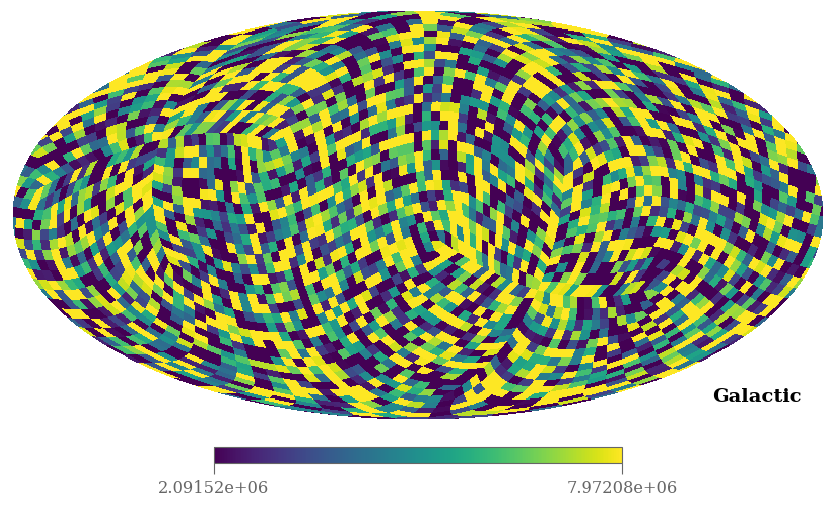

In [15]:
import healpy

grid = np.zeros(npix, dtype=sky.n.dtype)
grid[sky.hpx] = sky.n
try:
    mean = np.nanmean(grid)
    std = np.nanstd(grid)
except AttributeError:
    mean = 0
    std = 1
vmin = np.round(max(1, mean - 1 * std), 0)
vmax = np.round(max(1, mean + 1 * std), 0)

healpy.mollview(grid, nest=True, 
                min=vmin, max=vmax, 
                coord=('C', 'G'), title="")

LatexFigure("sky_vstselection", 
    f"""Distribution on the sky of the validation sources available in {RUNNAME:s}. The selection is only partly random. Half of the sample was selected for particular validation needs. Hence this map shows artifical density features such as the Kepler field, SDSS footprint etc.""",
options=r'width=0.6\columnwidth')

<div class="alert alert-block alert-warning">
    
💡 `LatexFigure` provides the necessary bits to use figures.
    
It takes care of exporting a PDF version of the figure, keeps track of the desired label, caption, and potential latex (includegraphics) options.

You can refer to a figure through its label, e.g. `[Figure sky_vstselection](#fig:sky_vstselection)`
    
</div>

[Figure sky_vstselection](#fig:sky_vstselection) shows the distribution on the sky of the targets.
The selection covers the entire sky but it is only partly random. Half of the sample was selected for particular validation needs. Hence this map shows artifical density features such as the Kepler field, SDSS footprint etc.

# Other tools and macros

## Complex text with computed values

Sometimes you need to generate text for a paragraph that needs to use calculated values. We provide `AutoText` to enable such output. It takes a Markdown formatted string and deals with either the notebook output or the latex exports transparently. For example

```python
AutoText(rf"""`{RUNNAME:s}` was a validation run and thus 
it contains only a limited sample of the Gaia data. 
...
""")
```

In [16]:
# RUNSIZE = db.query(f'select count(*) as n from {RUNNAME_ASP}_asp').n.values[0]
RUNSIZE = int(1234567)

AutoText(rf"""`{RUNNAME:s}` was a validation run and thus contains only a limited sample of the Gaia data. 
This run processed  ${RUNSIZE:,d}$ sources selected for validation (of which $\sim10$ million were randomly selected).
""")

`ops67b` was a validation run and thus contains only a limited sample of the Gaia data. 
This run processed  $1,234,567$ sources selected for validation (of which $\sim10$ million were randomly selected).


# Conclusions

<div class="alert alert-block alert-info">

Your conclusion should address the following:

* are the objectives fulfilled?
* new bugs leading to patches (incl. JIRA links)
* what level of quality for publishing the results?
* Next run objectives
    
</div>

This document is a template to use the `CU8val` package. It demonstrates the basic functionalities and how to use the CU8 validation macros.

## Acknowledgements

This work is the result of a lot of people that are most likely authors on this document.
But it is as important to credit the various supports.

<div class="alert alert-block alert-warning">
    
💡 `Acknowledgements` provides the necessary bits to set acknowledgement information.
    
</div>

In [17]:
Acknowledgements(r"""This document was prepared on the CU8 Validation Database supported and maintained at ESAC.
This work made use of the [Jupyter](https://jupyter.org) package and ecosystem. 
It also heavily relies on [nbconvert](https://nbconvert.readthedocs.io) and [mf\_jupyter](https://github.com/mfouesneau/mf\_jupyter).
""")

**acknowledgements**
This document was prepared on the CU8 Validation Database supported and maintained at ESAC.
This work made use of the [Jupyter](https://jupyter.org) package and ecosystem. 
It also heavily relies on [nbconvert](https://nbconvert.readthedocs.io) and [mf\_jupyter](https://github.com/mfouesneau/mf\_jupyter).


# Compile the current document

In [18]:
# force a save of the notebook before making the PDF
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_notebook();'))

# convert to DPAC TR document.
from mf_jupyter.convert import convert_notebook
texdirs = ["/home/jovyan/work/share/cu8val_users/texmf//",]
convert_notebook('template_notebook', template='dpac', silent=True, texdirs=texdirs)

<IPython.core.display.Javascript object>

jupyter nbconvert  --config=/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/mf_jupyter/config.py --to=latex --template=dpac --TemplateExporter.extra_template_basedirs=/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/mf_jupyter/templates template_notebook --debug
.........................................
conversion to tex:  success
export TEXINPUTS=.:/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/mf_jupyter/texlibs/texmf//:/home/jovyan/work/share/cu8val_users/texmf////:
    pdflatex -enable-write18 -shell-escape -interaction=nonstopmode template_notebook
    bibtex template_notebook
    pdflatex -enable-write18 -shell-escape -interaction=nonstopmode template_notebook
    pdflatex -enable-write18 -shell-escape -interaction=nonstopmode template_notebook


/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/mf_jupyter/convert.py:127: ResourceWarning: unclosed file <_io.BufferedWriter name=94>
  p = Popen(cmd.replace('\n', '; '), shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)
/Users/fouesneau/Work/projects/gaia-cu8/cu8val/venv/lib/python3.11/site-packages/mf_jupyter/convert.py:127: ResourceWarning: unclosed file <_io.BufferedReader name=95>
  p = Popen(cmd.replace('\n', '; '), shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/subprocess.py:1125: ResourceWarning: subprocess 70986 is still running
  _warn("subprocess %s is still running" % self.pid,
/var/folders/jb/twt_8kfx4mj86m9v8jgccs_r5gbl99/T/ipykernel_70898/1367639123.py:8: ResourceWarning: unclosed file <_io.BufferedWriter name=96>
  convert_notebook('template_notebook', template='dpac', silent=True, texdirs=texdirs)
/var/folders/jb/twt_8kfx4mj86m9v8jgccs_r5gbl99/T/ipykernel_70898/1367639123.py:8: ResourceWarning: unclosed file <_io.BufferedReader name=97>
  convert_notebook('template_notebook', template='dpac', silent=True, texdirs=texdirs)


In [19]:
!open template_notebook.pdf